In [ ]:
import pandas as pd

file_path = 'taxburden_1970-2019.csv'
df = pd.read_csv(file_path)
df.head()

,Abbr,State,Year,SubMeasureDesc,Data_Value
0,IA,Iowa,1985,State_Tax,0.180
1,MA,Massachusetts,1972,State_Tax,0.160
2,ID,Idaho,2003,State_Tax,0.570
3,UT,Utah,2002,State_Tax,0.695
4,ME,Maine,2008,State_Tax,2.000


In [ ]:
df = df.rename(columns={"Data_Value": "y"})


In [ ]:
# Use pandas pivot function to widen the dataframe
df_wide = df.pivot(index=['Year', 'Abbr', 'State'], columns='SubMeasureDesc', values='y')

# Reset the index to make 'Year', 'Abbr', and 'State' normal columns again
df_wide.reset_index(inplace=True)

df = df_wide

df.head()


SubMeasureDesc,Year,Abbr,State,Consumption_per_capita,Cost_per_pack,State_Tax,Total_Tax
0,1970,AK,Alaska,121.3,0.418,0.0800,0.1600
1,1970,AL,Alabama,89.8,0.427,0.1200,0.2000
2,1970,AR,Arkansas,100.3,0.388,0.1225,0.2075
3,1970,AZ,Arizona,115.2,0.385,0.1000,0.1800
4,1970,CA,California,123.0,0.397,0.1000,0.1800


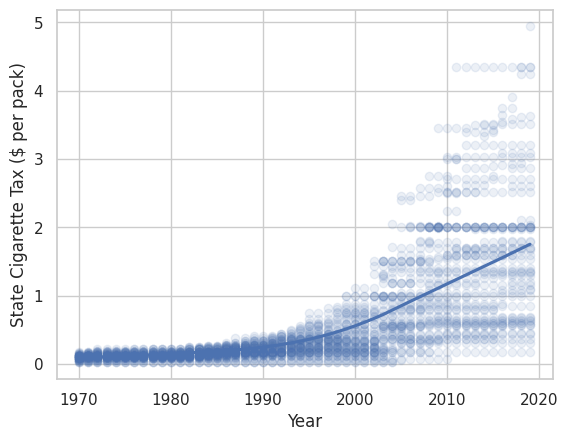

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a scatter plot with a regression line
sns.regplot(x="Year", y="State_Tax", data=df, scatter_kws={'alpha':0.1}, lowess=True)

# Set the title of the plot
ax.set_title('')
plt.ylabel('State Cigarette Tax ($ per pack)')  # Adding y-axis label

# Show the plot
plt.show()


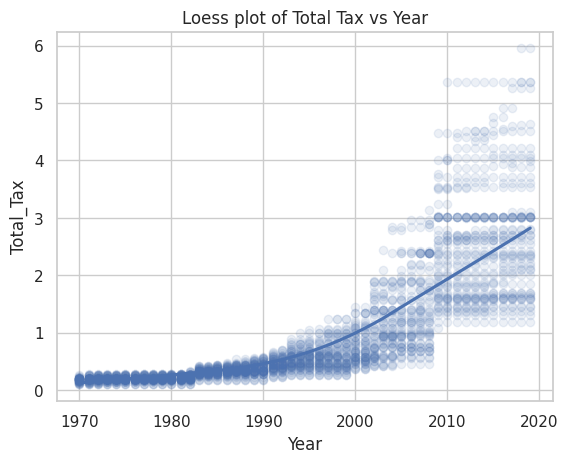

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a scatter plot with a regression line
sns.regplot(x="Year", y="Total_Tax", data=df, scatter_kws={'alpha':0.1}, lowess=True)

# Set the title of the plot
ax.set_title('Loess plot of Total Tax vs Year')

# Show the plot
plt.show()


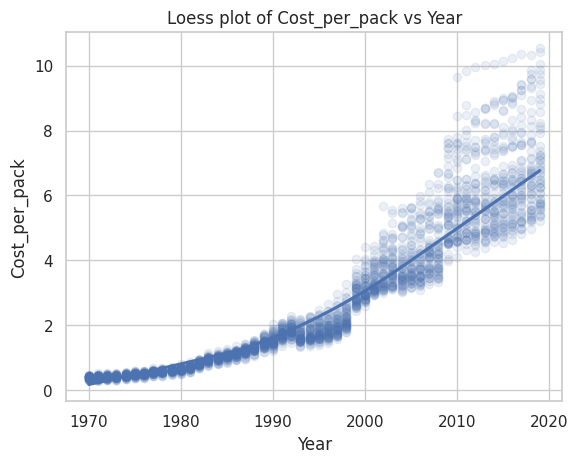

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a scatter plot with a regression line
sns.regplot(x="Year", y="Cost_per_pack", data=df, scatter_kws={'alpha':0.1}, lowess=True)

# Set the title of the plot
ax.set_title('Loess plot of Cost_per_pack vs Year')

# Show the plot
plt.show()


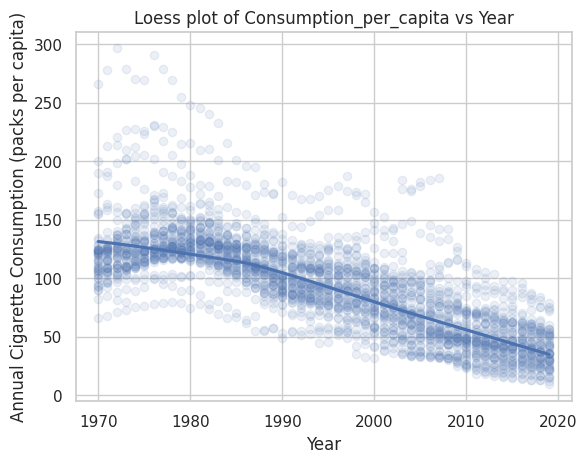

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a scatter plot with a regression line
sns.regplot(x="Year", y="Consumption_per_capita", data=df, scatter_kws={'alpha':0.1}, lowess=True)

# Set the title of the plot
ax.set_title('Loess plot of Consumption_per_capita vs Year')
plt.ylabel('Annual Cigarette Consumption (packs per capita)')  # Adding y-axis label

# Show the plot
plt.show()


In [ ]:
import numpy as np
import statsmodels.formula.api as smf

# Create a new DataFrame df for the regression
df = df.copy()

# Convert 'State' and 'Year' to categorical variables for fixed-effects
df['State'] = df['State'].astype('category')
df['Year'] = df['Year'].astype('category')

# Define the regression formula
formula = 'Consumption_per_capita ~ State_Tax + C(State) + C(Year)'

# Run the regression with clustered standard errors at the state level
model = smf.ols(formula, data=df)
results = model.fit(cov_type='cluster', cov_kwds={'groups': df['State']})

# Print only the State_Tax coefficient stats
print(f"State_Tax coefficient: {results.params['State_Tax']}")
print(f"State_Tax standard error: {results.bse['State_Tax']}")
print(f"State_Tax coefficient confidence interval: {results.conf_int().loc['State_Tax']}")

# Compute the marginal effect of State_Tax on Consumption_per_capita
marginal_effect = results.params['State_Tax']
print(f"\nThe marginal effect of State_Tax on Consumption_per_capita is {marginal_effect}.")

# Estimate the elasticity of Consumption_per_capita with respect to State_Tax
elasticity = np.mean(df['State_Tax'] / df['Consumption_per_capita']) * marginal_effect
print(f"The estimated elasticity of Consumption_per_capita with respect to State_Tax is {elasticity}.")


State_Tax coefficient: -9.414287907760288
State_Tax standard error: 2.3717975902278012
State_Tax coefficient confidence interval: 0   -14.062926
1    -4.765650
Name: State_Tax, dtype: float64

The marginal effect of State_Tax on Consumption_per_capita is -9.414287907760288.
The estimated elasticity of Consumption_per_capita with respect to State_Tax is -0.13491548077621018.


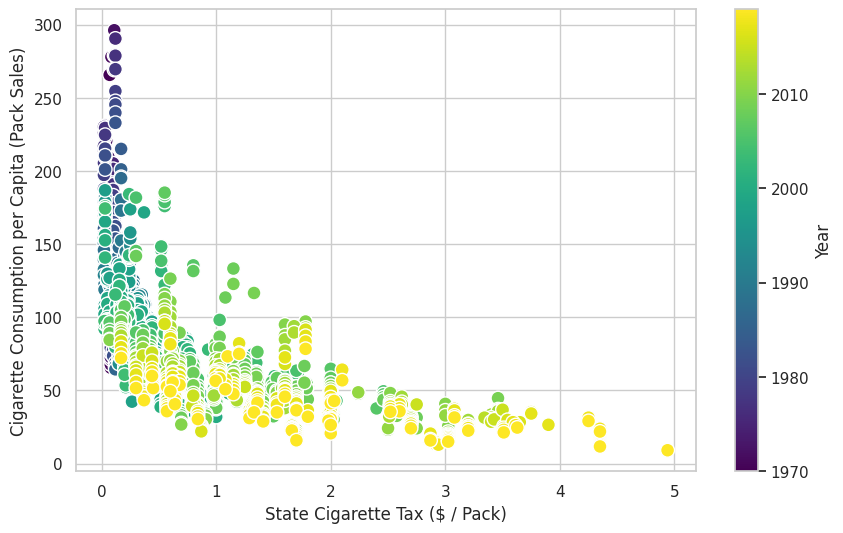

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' column to numeric if it's not already
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

plt.figure(figsize=(10, 6))

# Normalize the year data for the colormap
norm = plt.Normalize(df['Year'].min(), df['Year'].max())

# Create the scatter plot
scatter = plt.scatter(x=df['State_Tax'],
                      y=df['Consumption_per_capita'],
                      c=df['Year'],
                      cmap='viridis',
                      edgecolor='w',
                      s=100,
                      norm=norm)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Set labels and title
plt.xlabel('State Cigarette Tax ($ / Pack)')
plt.ylabel('Cigarette Consumption per Capita (Pack Sales)')
plt.title('')
plt.show()


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df and has columns 'State', 'Year', and 'State_Tax'

# Filter the DataFrame for the years 1970 and 2019
df_filtered = df[df['Year'].isin([1970, 2019])]

# Pivot the DataFrame to get 'State_Tax' for the years 1970 and 2019 in separate columns
df_pivot = df_filtered.pivot(index='State', columns='Year', values='State_Tax')

# Calculate the difference in 'State_Tax' between 2019 and 1970
df_pivot['Tax_Increase'] = df_pivot[2019] - df_pivot[1970]

# Sort the DataFrame by 'Tax_Increase' in ascending order
df_sorted = df_pivot.sort_values(by='Tax_Increase')

# Reset index to convert the 'State' index back to a column
df_sorted.reset_index(inplace=True)

# Display the result
print(df_sorted[['State', 'Tax_Increase']])


Year                 State  Tax_Increase
0                 Missouri        0.0800
1                 Virginia        0.2750
2                  Georgia        0.2900
3             North Dakota        0.3300
4           North Carolina        0.4300
5                Tennessee        0.4900
6                    Idaho        0.5000
7           South Carolina        0.5100
8                  Wyoming        0.5400
9                  Alabama        0.5550
10                Nebraska        0.5600
11             Mississippi        0.5900
12                Colorado        0.7900
13                 Indiana        0.9350
14               Louisiana        1.0000
15                Arkansas        1.0275
16                Kentucky        1.0750
17           West Virginia        1.1300
18                 Florida        1.1890
19                  Kansas        1.2100
20                   Texas        1.2550
21                    Iowa        1.2600
22                  Oregon        1.2900
23            So

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df and has columns 'State', 'Year', and 'State_Tax'

# Filter the DataFrame for the years 1970 and 2019
df_filtered = df[df['Year'].isin([1970, 2019])]

# Pivot the DataFrame to get 'State_Tax' for the years 1970 and 2019 in separate columns
df_pivot = df_filtered.pivot(index='State', columns='Year', values='State_Tax')

# Reset index to convert the 'State' index back to a column
df_pivot.reset_index(inplace=True)

# Rename the columns for better readability
df_pivot.columns = ['State', 'State_Tax_1970', 'State_Tax_2019']

# Display the result
print(df_pivot)


                   State  State_Tax_1970  State_Tax_2019
0                Alabama          0.1200           0.675
1                 Alaska          0.0800           2.000
2                Arizona          0.1000           2.000
3               Arkansas          0.1225           1.150
4             California          0.1000           2.870
5               Colorado          0.0500           0.840
6            Connecticut          0.1600           4.350
7               Delaware          0.1100           2.100
8   District of Columbia          0.0400           4.940
9                Florida          0.1500           1.339
10               Georgia          0.0800           0.370
11                Hawaii          0.0800           3.200
12                 Idaho          0.0700           0.570
13              Illinois          0.1200           1.980
14               Indiana          0.0600           0.995
15                  Iowa          0.1000           1.360
16                Kansas       

In [ ]:
import pandas as pd

file_path = 'LC-inc.csv'
dfinc = pd.read_csv(file_path)
dfinc['Raw_Rate'] = dfinc['Rate']

dfinc.head()

,Type,Year,Cancer-Year,State,Sex,Rate,Count,Pop,Raw_Rate
0,Small-Cell,1970,2000,Alabama,Male and female,35.5,405,"1,140,707",35.5
1,Small-Cell,1970,2000,Alabama,Male,45.6,229,"524,533",45.6
2,Small-Cell,1970,2000,Alabama,Female,28,176,"616,174",28
3,Small-Cell,1970,2000,Alaska,Male and female,40.5,39,"116,540",40.5
4,Small-Cell,1970,2000,Alaska,Male,37.9,19,"61,073",37.9


In [ ]:
import pandas as pd

# Assuming dfinc is already defined and contains your data

# Step 1: Check if 'Rate' column is numeric
dfinc['Rate'] = pd.to_numeric(dfinc['Rate'], errors='coerce')

# Step 2: Identify non-numeric 'Rate' values (they will be converted to NaN)
non_numeric_rate = dfinc[dfinc['Rate'].isna()]

if non_numeric_rate.empty:
    print("All 'Rate' values are numeric.")
else:
    print("There are non-numeric 'Rate' values in the DataFrame.")
    print(non_numeric_rate[['State', 'Year', 'Sex', 'Rate']])


There are non-numeric 'Rate' values in the DataFrame.
             State  Year                Sex  Rate
9         Arkansas  1970    Male and female   NaN
10        Arkansas  1970               Male   NaN
11        Arkansas  1970             Female   NaN
69     Mississippi  1970    Male and female   NaN
70     Mississippi  1970               Male   NaN
...            ...   ...                ...   ...
11782       Nevada  1988               Male   NaN
11783       Nevada  1988             Female   NaN
11931       Nevada  1989    Male and female   NaN
11932       Nevada  1989               Male   NaN
11933       Nevada  1989             Female   NaN

[182 rows x 4 columns]


In [ ]:
import pandas as pd

# Assuming dfinc is already defined and contains your data

# Step 1: Check if there are any missing 'Rate' values
if dfinc['Rate'].isna().any():
    print("There are missing 'Rate' values in the DataFrame.")
else:
    print("There are no missing 'Rate' values in the DataFrame.")

# Step 2: Count total number of missing 'Rate' values
total_missing_rate = dfinc['Rate'].isna().sum()
print(f"Total number of missing 'Rate' values: {total_missing_rate}")

# Step 3: Tabulate missing 'Rate' values by 'State', 'Year', and 'Sex'
missing_by_state_year_sex = dfinc[dfinc['Rate'].isna()].groupby(['State', 'Year', 'Sex', 'Type']).size().reset_index(name='MissingCount')
print(missing_by_state_year_sex)


There are missing 'Rate' values in the DataFrame.
Total number of missing 'Rate' values: 182
             State  Year                Sex            Type  MissingCount
0         Arkansas  1970             Female  Adenocarcinoma             1
1         Arkansas  1970             Female           Other             1
2         Arkansas  1970             Female      Small-Cell             1
3         Arkansas  1970             Female   Squamous-Cell             1
4         Arkansas  1970               Male  Adenocarcinoma             1
..             ...   ...                ...             ...           ...
177       Virginia  1971    Male and female           Other             1
178       Virginia  1971    Male and female      Small-Cell             1
179       Virginia  1971    Male and female   Squamous-Cell             1
180  Washington DC  1984               Male      Small-Cell             1
181  Washington DC  1988             Female      Small-Cell             1

[182 rows x 5 colu

In [ ]:
import pandas as pd

# Assuming dfinc is already defined and contains your data

# Step 1: Check if 'Rate' column is numeric and handle non-numeric values
dfinc['Rate'] = pd.to_numeric(dfinc['Rate'], errors='coerce')

# Step 2: Sort the DataFrame by 'State', 'Type', 'Sex', and 'Year'
dfinc = dfinc.sort_values(by=['Type', 'State', 'Sex', 'Year'])

# Step 3: Define a function to interpolate missing 'Rate' values within each group
def interpolate_rate(group):
    group['Rate'] = group['Rate'].interpolate(method='linear', limit_direction='both')
    return group

# Step 4: Apply the interpolation function to each group
dfinc = dfinc.groupby(['Type', 'State', 'Sex']).apply(interpolate_rate).reset_index(drop=True)

# Step 5: Verify if there are any remaining missing values in 'Rate'
remaining_missing_rate = dfinc['Rate'].isna().sum()
print(f"Remaining number of missing 'Rate' values: {remaining_missing_rate}")

# Display the updated DataFrame
print(dfinc)


Remaining number of missing 'Rate' values: 0
                 Type  Year  Cancer-Year    State                Sex  Rate  \
0      Adenocarcinoma  1970         2000  Alabama             Female  48.6   
1      Adenocarcinoma  1971         2001  Alabama             Female  43.6   
2      Adenocarcinoma  1972         2002  Alabama             Female  50.0   
3      Adenocarcinoma  1973         2003  Alabama             Female  46.0   
4      Adenocarcinoma  1974         2004  Alabama             Female  44.7   
...               ...   ...          ...      ...                ...   ...   
11995   Squamous-Cell  1985         2015  Wyoming    Male and female  30.7   
11996   Squamous-Cell  1986         2016  Wyoming    Male and female  30.1   
11997   Squamous-Cell  1987         2017  Wyoming    Male and female  33.5   
11998   Squamous-Cell  1988         2018  Wyoming    Male and female  29.9   
11999   Squamous-Cell  1989         2019  Wyoming    Male and female  27.5   

      Count      P

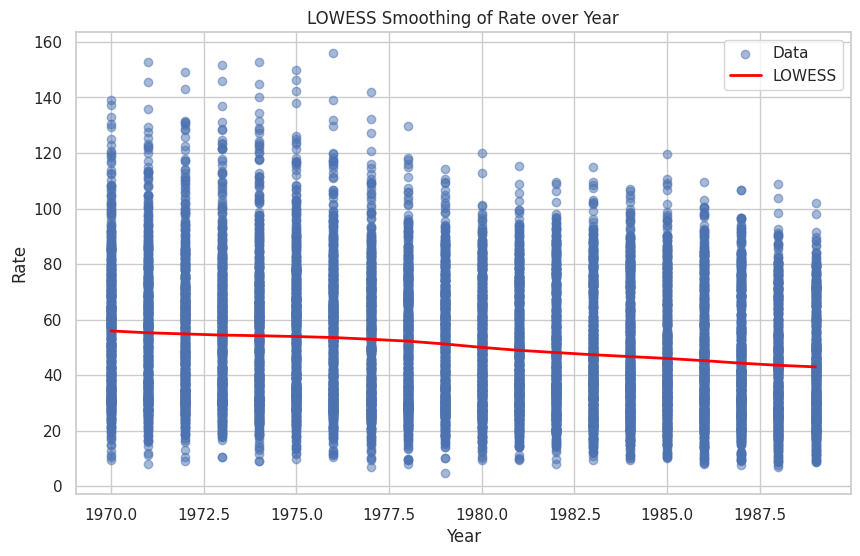

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming dfinc is already defined and contains your data

# Step 1: Check if 'Rate' column is numeric and handle non-numeric values
dfinc['Rate'] = pd.to_numeric(dfinc['Rate'], errors='coerce')

# Step 2: Define the X and Y variables
X = dfinc['Year']
Y = dfinc['Rate']

# Step 3: Perform LOWESS smoothing
lowess = sm.nonparametric.lowess(Y, X, frac=0.2)  # frac is the smoothing parameter

# Step 4: Extract the smoothed values
lowess_X = lowess[:, 0]
lowess_Y = lowess[:, 1]

# Step 5: Create the scatter plot and LOWESS line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5, label='Data')
plt.plot(lowess_X, lowess_Y, color='red', label='LOWESS', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('LOWESS Smoothing of Rate over Year')
plt.legend()
plt.show()


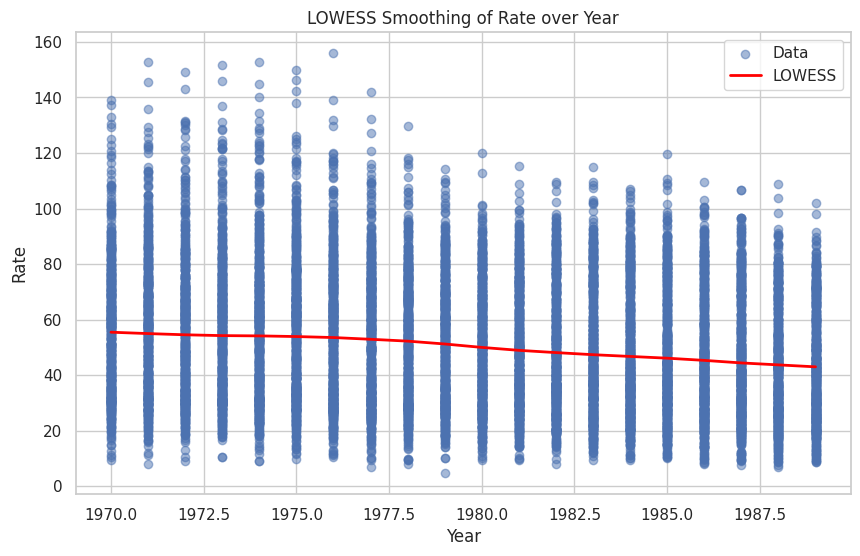

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming dfinc is already defined and contains your data

# Step 1: Check if 'Rate' column is numeric and handle non-numeric values
dfinc['Raw_Rate'] = pd.to_numeric(dfinc['Raw_Rate'], errors='coerce')

# Step 2: Define the X and Y variables
X = dfinc['Year']
Y = dfinc['Raw_Rate']

# Step 3: Perform LOWESS smoothing
lowess = sm.nonparametric.lowess(Y, X, frac=0.2)  # frac is the smoothing parameter

# Step 4: Extract the smoothed values
lowess_X = lowess[:, 0]
lowess_Y = lowess[:, 1]

# Step 5: Create the scatter plot and LOWESS line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5, label='Data')
plt.plot(lowess_X, lowess_Y, color='red', label='LOWESS', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('LOWESS Smoothing of Rate over Year')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Assuming df and dfinc are already defined and contain your data

# Step 1: Perform the merge operation on 'Year' and 'State'
merged_df = pd.merge(df, dfinc, on=['Year', 'State'], how='left')

# Step 2: Display the resulting DataFrame
print(merged_df)


       Year Abbr          State  Consumption_per_capita  Cost_per_pack  \
0      1970   AK         Alaska                   121.3          0.418   
1      1970   AK         Alaska                   121.3          0.418   
2      1970   AK         Alaska                   121.3          0.418   
3      1970   AK         Alaska                   121.3          0.418   
4      1970   AK         Alaska                   121.3          0.418   
...     ...  ...            ...                     ...            ...   
13325  2019   VT        Vermont                    31.5          8.823   
13326  2019   WA     Washington                    15.0          8.569   
13327  2019   WI      Wisconsin                    35.4          7.930   
13328  2019   WV  West Virginia                    75.0          6.237   
13329  2019   WY        Wyoming                    49.4          5.679   

       State_Tax  Total_Tax            Type  Cancer-Year                Sex  \
0          0.080      0.160  Ade

In [ ]:
import pandas as pd

file_path = 'state-ue.csv'
dfue = pd.read_csv(file_path)
dfue.head()

,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,8.9,10.6,14.1,13.8,11.0,9.2,9.7,8.1,7.2,...,10.5,9.6,8.0,7.2,6.8,6.1,5.8,4.4,3.9,3.2
1,Alaska,9.6,9.4,9.9,9.9,9.8,9.7,10.9,10.3,8.8,...,7.9,7.6,7.1,7.0,6.9,6.5,6.9,7.0,6.6,5.6
2,Arizona,6.6,6.2,10.1,8.8,5.2,6.3,6.9,6.5,6.4,...,10.4,9.5,8.3,7.7,6.8,6.1,5.4,4.9,4.8,4.8
3,Arkansas,7.6,8.7,9.9,9.9,8.7,8.7,8.6,8.1,7.6,...,8.2,8.3,7.6,7.2,6.0,5.0,4.0,3.7,3.7,3.5
4,California,6.8,7.4,10.0,9.8,7.8,7.2,6.7,5.8,5.3,...,12.2,11.7,10.4,8.9,7.5,6.2,5.5,4.8,4.2,4.1


In [ ]:
# Reshape from wide to long format
dfue_long = pd.melt(dfue, id_vars=['State'], var_name='Year', value_name='UE')

# Convert 'Year' column to numeric (if needed)
dfue_long['Year'] = pd.to_numeric(dfue_long['Year'])

# Sort by 'State' and 'Year' if needed
dfue_long = dfue_long.sort_values(by=['State', 'Year'])

# Display the resulting dataframe
print(dfue_long)

        State  Year    UE
0     Alabama  1980   8.9
54    Alabama  1981  10.6
108   Alabama  1982  14.1
162   Alabama  1983  13.8
216   Alabama  1984  11.0
...       ...   ...   ...
2104      NaN  2018   NaN
2105      NaN  2018   NaN
2157      NaN  2019   NaN
2158      NaN  2019   NaN
2159      NaN  2019   NaN

[2160 rows x 3 columns]


In [ ]:
data_count_by_state = dfue_long.groupby('State').size().reset_index(name='Count')

# Display the counts
print(data_count_by_state)

                   State  Count
0                Alabama     40
1                 Alaska     40
2                Arizona     40
3               Arkansas     40
4             California     40
5               Colorado     40
6            Connecticut     40
7               Delaware     40
8   District of Columbia     40
9                Florida     40
10               Georgia     40
11                Hawaii     40
12                 Idaho     40
13              Illinois     40
14               Indiana     40
15                  Iowa     40
16                Kansas     40
17              Kentucky     40
18             Louisiana     40
19                 Maine     40
20              Maryland     40
21         Massachusetts     40
22              Michigan     40
23             Minnesota     40
24           Mississippi     40
25              Missouri     40
26               Montana     40
27              Nebraska     40
28                Nevada     40
29         New Hampshire     40
30      

In [ ]:
dfue_long_filtered = dfue_long[dfue_long['Year'] >= 2000]
dfue_long_filtered.head()

,State,Year,UE
1080,Alabama,2000,4.6
1134,Alabama,2001,5.1
1188,Alabama,2002,5.9
1242,Alabama,2003,6.0
1296,Alabama,2004,5.7


In [ ]:
# Select columns 'State' and '1980' to '1999'
columns_to_keep = ['State'] + [str(year) for year in range(1980, 2000)]
dfue_filtered = dfue[columns_to_keep]

# Display the filtered dataframe
print(dfue_filtered)

                   State  1980  1981  1982  1983  1984  1985  1986  1987  \
0                Alabama   8.9  10.6  14.1  13.8  11.0   9.2   9.7   8.1   
1                 Alaska   9.6   9.4   9.9   9.9   9.8   9.7  10.9  10.3   
2                Arizona   6.6   6.2  10.1   8.8   5.2   6.3   6.9   6.5   
3               Arkansas   7.6   8.7   9.9   9.9   8.7   8.7   8.6   8.1   
4             California   6.8   7.4  10.0   9.8   7.8   7.2   6.7   5.8   
5               Colorado   5.8   5.7   7.3   7.1   5.4   6.1   7.5   7.5   
6            Connecticut   5.8   6.2   6.9   6.0   4.7   4.7   3.8   3.4   
7               Delaware   7.6   7.8   8.4   7.7   6.3   5.1   4.3   3.1   
8   District of Columbia   7.4   8.9  10.4  11.2   9.1   8.1   7.5   6.3   
9                Florida   6.1   6.7   8.4   8.5   6.4   6.0   5.8   5.3   
10               Georgia   6.3   6.4   7.8   7.7   6.1   6.4   6.0   5.7   
11                Hawaii   5.0   5.4   6.3   6.2   5.7   5.4   4.8   3.8   
12          

In [ ]:
dfue_filtered = dfue_filtered.dropna()

# Display the dataframe after dropping NA values
print(dfue_filtered)

                   State  1980  1981  1982  1983  1984  1985  1986  1987  \
0                Alabama   8.9  10.6  14.1  13.8  11.0   9.2   9.7   8.1   
1                 Alaska   9.6   9.4   9.9   9.9   9.8   9.7  10.9  10.3   
2                Arizona   6.6   6.2  10.1   8.8   5.2   6.3   6.9   6.5   
3               Arkansas   7.6   8.7   9.9   9.9   8.7   8.7   8.6   8.1   
4             California   6.8   7.4  10.0   9.8   7.8   7.2   6.7   5.8   
5               Colorado   5.8   5.7   7.3   7.1   5.4   6.1   7.5   7.5   
6            Connecticut   5.8   6.2   6.9   6.0   4.7   4.7   3.8   3.4   
7               Delaware   7.6   7.8   8.4   7.7   6.3   5.1   4.3   3.1   
8   District of Columbia   7.4   8.9  10.4  11.2   9.1   8.1   7.5   6.3   
9                Florida   6.1   6.7   8.4   8.5   6.4   6.0   5.8   5.3   
10               Georgia   6.3   6.4   7.8   7.7   6.1   6.4   6.0   5.7   
11                Hawaii   5.0   5.4   6.3   6.2   5.7   5.4   4.8   3.8   
12          

In [ ]:
final_dfue = pd.merge(dfue_filtered, dfue_long_filtered, on='State')
print(final_dfue)

        State  1980  1981  1982  1983  1984  1985  1986  1987  1988  ...  \
0     Alabama   8.9  10.6  14.1  13.8  11.0   9.2   9.7   8.1   7.2  ...   
1     Alabama   8.9  10.6  14.1  13.8  11.0   9.2   9.7   8.1   7.2  ...   
2     Alabama   8.9  10.6  14.1  13.8  11.0   9.2   9.7   8.1   7.2  ...   
3     Alabama   8.9  10.6  14.1  13.8  11.0   9.2   9.7   8.1   7.2  ...   
4     Alabama   8.9  10.6  14.1  13.8  11.0   9.2   9.7   8.1   7.2  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1015  Wyoming   3.9   4.1   6.2   8.2   6.3   6.9   8.9   8.0   6.5  ...   
1016  Wyoming   3.9   4.1   6.2   8.2   6.3   6.9   8.9   8.0   6.5  ...   
1017  Wyoming   3.9   4.1   6.2   8.2   6.3   6.9   8.9   8.0   6.5  ...   
1018  Wyoming   3.9   4.1   6.2   8.2   6.3   6.9   8.9   8.0   6.5  ...   
1019  Wyoming   3.9   4.1   6.2   8.2   6.3   6.9   8.9   8.0   6.5  ...   

      1992  1993  1994  1995  1996  1997  1998  1999  Year   UE  
0      7.6   7.3   6.

In [ ]:
final_dfue = final_dfue.rename(columns={'Year': 'Cancer-Year'})


In [ ]:
analytic_df = pd.merge(merged_df, final_dfue, on=['State', 'Cancer-Year'])

# Display the merged dataframe
print(analytic_df)

       Year Abbr    State  Consumption_per_capita  Cost_per_pack  State_Tax  \
0      1970   AK   Alaska                   121.3          0.418       0.08   
1      1970   AK   Alaska                   121.3          0.418       0.08   
2      1970   AK   Alaska                   121.3          0.418       0.08   
3      1970   AK   Alaska                   121.3          0.418       0.08   
4      1970   AK   Alaska                   121.3          0.418       0.08   
...     ...  ...      ...                     ...            ...        ...   
11755  1989   WY  Wyoming                   111.4          1.295       0.08   
11756  1989   WY  Wyoming                   111.4          1.295       0.08   
11757  1989   WY  Wyoming                   111.4          1.295       0.08   
11758  1989   WY  Wyoming                   111.4          1.295       0.08   
11759  1989   WY  Wyoming                   111.4          1.295       0.08   

       Total_Tax            Type  Cancer-Year      

In [ ]:
# Filter rows where Rate is NaN
na_rows = analytic_df[analytic_df['Rate'].isna()]

# Count NaN values by State and Year
na_counts = na_rows.groupby(['State', 'Year']).size().reset_index(name='NA Count')

# Display the counts where Rate is NaN
print(na_counts)

Empty DataFrame
Columns: [State, Year, NA Count]
Index: []


In [ ]:
# Export dataframe to CSV
analytic_df.to_csv('analytic_df.csv', index=False)

print("DataFrame exported successfully to 'analytic_df.csv'")

DataFrame exported successfully to 'analytic_df.csv'
